Deep Learning HW3- part 1

BY: Dema Omar , Aya Fodi

# Part 1: Song Lyrics Generation

In this part, we will explore **text generation using deep learning**, specifically generating song lyrics based on a dataset of real songs.  
The dataset is provided as a **CSV file** containing:
- Artist name  
- Song title  
- Song lyrics  

---

### 1. Data Exploration
- Load the dataset into the notebook and display a few sample rows.  
- List all **artists** and count how many songs each one has.  
- Print the **total number of songs** and the **size of the dataset**.  
- Calculate the **average number of characters and words per song**.  
- Visualize the dataset using a **word cloud**, showing the most frequent words in the lyrics.  
- Print the **top 3 most used words** in the dataset.

---

### 2. Preprocessing
- Create a **corpus** from the lyrics.  
- Clean the text by removing unwanted symbols or foreign characters.  
- **Encode** the data to prepare it for training.

---

### 3. Model Definition and Training
- Build an **LSTM-based model** for sequential text generation.  
- Choose any suitable **loss function** and **optimizer**.  
- Train the model for **100 epochs** and plot the **training loss** across epochs.

---

### 4. Evaluation and Text Generation
- Define a function `LyricsGenerator(starting_string, char_count)` to generate new lyrics:
  - The model should start from the given text and continue until reaching the desired length.  
  - Implement at least **two sampling strategies** (e.g., top-k, top-p).  

- Generate **three songs** using different starting strings:
  1. `"it's not a silly little moment …"`  
  2. Your favorite song’s first line (write it above the cell).  
  3. An **empty string** to generate a song from scratch.

- For each song, show **at least two generations** using different strategies.

---

### 5. Visualization and Analysis
- Compare the generated outputs from different strategies.  
- Discuss how the model’s predictions vary depending on the input and sampling method.  
- Showcase examples of generated lyrics and analyze their quality and coherence.

---

This task focuses on understanding **sequence modeling with LSTMs**, **creative text generation**, and **evaluation of generative language models**.


In [ ]:
import numpy as np
import pandas as pd

Mounted at /content/drive
         Artist     Title                                             Lyrics
0  Taylor Swift  cardigan  Vintage tee, brand new phone\nHigh heels on co...
1  Taylor Swift     exile  I can see you standing, honey\nWith his arms a...


Artist song counts:
Artist
Taylor Swift          50
Billie Eilish         50
David Bowie           50
Billy Joel            50
Eric Clapton          50
Leonard Cohen         50
Bruce Springsteen     40
The Beatles           35
Vance Joy             30
Bryan Adams           30
Lana Del Rey          30
Nat King Cole         30
​twenty one pilots    30
Elton John            30
Ray LaMontagne        30
John Denver           30
Frank Sinatra         30
George Michael        30
Queen                 30
Ed Sheeran            20
Bob Dylan             20
Name: count, dtype: int64


Size of the dataset (rows, columns): (745, 3)
Total number of songs: 745


Average number of characters per song: 1169.1073825503356
Average number of words per 

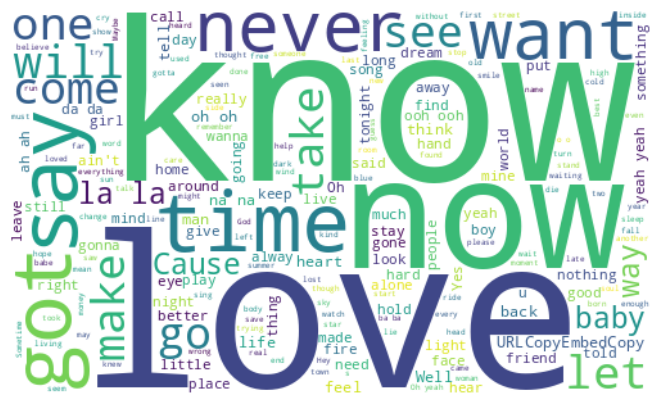

In [ ]:
from google.colab import drive
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

drive.mount('/content/drive', force_remount=True)

data_set = pd.read_csv('/content/drive/My Drive/Deep learning/Songs.csv')

print(data_set.head(2))

artist_song_counts = data_set['Artist'].value_counts()
print("\n")
print("Artist song counts:")
print(artist_song_counts)
print("\n")

print("Size of the dataset (rows, columns):", data_set.shape)

print("Total number of songs:", data_set.shape[0])

print("\n")
# Calculate the number of characters and words for each song
data_set['num_characters'] = data_set['Lyrics'].apply(lambda x: len(x.replace(" ", "")))
data_set['num_words'] = data_set['Lyrics'].apply(lambda x: len(x.split()))

# Calculate the average number of characters and words
avg_chars = data_set['num_characters'].mean()
avg_words = data_set['num_words'].mean()

# Print the results
print("Average number of characters per song:", avg_chars)
print("Average number of words per song:", avg_words)
print("\n")

# Combine all song lyrics into one giant string
all_lyrics = ' '.join(data_set['Lyrics'])

# Calculate the frequency of each word
from collections import Counter
word_counts = Counter(all_lyrics.split())

# Print the top 3 most common words
print("Top 3 most used words in the songs:")
print(word_counts.most_common(3))

# Generate a word cloud image
wordcloud = WordCloud(width = 500, height = 300, background_color ='white').generate(all_lyrics)

# Display the generated image:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


To better understand which characters and words are not significant for analyzing the lyrics, we initially printed all the songs as part of the preprocessing stage. The purpose of this printing was to identify elements that should be removed from the text before further processing. This included unwanted characters, numbers that do not add information about the content, and punctuation marks that could mislead during the analysis. This allowed us to efficiently clean the text and obtain clean data that is ready for further processing.

In [ ]:
import re

# Create a corpus from the given lyrics
corpus = data_set['Lyrics'].tolist()

#Print the corpus to see what we shuld clean
#print(corpus)

#for index, lyrics in enumerate(corpus):
#    print(f"Corpus {index + 1}: {lyrics}\n")

def clean_text(text):
    # Normalize white spaces by removing newlines
    text = re.sub(r'\n', ' ', text)
    # Remove unicode characters such as '\u2005'
    text = re.sub(r'\\u[0-9a-fA-F]{4}', '', text)
    # Remove numbers followed by specific text pattern
    text = re.sub(r'\d+EmbedShare URLCopyEmbedCopy', '', text)
    # Optionally, remove non-ASCII characters to keep only English text
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    # Add a space before the comma if it's missing
    text = re.sub(r'(\S),', r'\1 ,', text)
    # Remove commas
    text = re.sub(r',', '', text)
    # Convert to lower case to standardize the text
    text = text.lower()
    return text

corpus_clean = [clean_text(song) for song in corpus]
print(corpus_clean[20])



please picture me in the trees i hit my peak at seven feet in the swing over the creek i was too scared to jump in but i  i was high in the sky with pennsylvania under me are there still beautiful things?  sweet tea in the summer cross your heart  won't tell no other and though i can t recall your face i still got love for you your braids like a pattern love you to the moon and to saturn passed down like folk songs the love lasts so long  and i've been meaning to tell you i think your house is haunted your dad is always mad and that must be why and i think you should come live with me and we can be pirates then you won't have to cry or hide in the closet and just like a folk song our love will be passed on please picture me in the weeds before i learned civility i used to scream ferociously any time i wanted i  i  sweet tea in the summer cross my heart  won t tell no other and though i can't recall your face i still got love for you pack your dolls and a sweater we'll move to india for

A dictionary "word_to_ix": is created, mapping each unique word to an index, starting with special tokens <sos> (start of song) and <eos> (end of song) and <pad> that uset to padding .his dictionary is used to convert all words in the cleaned corpus into indices.
"prepare_sequence": takes a list of words and converts it into a tensor of indices representing those words, ready for model training.
Since LSTM models may struggle with capturing long-term dependencies, we decided to segment each song into parts, each containing 50 words. To ensure that the context between segments is not lost, we implemented an overlap of five words in each subsequent segment by advancing 45 words each time. and use padding if the last section is uncomplete.
 I created the LyricsDataset class to manage sequences of lyrics efficiently. This dataset class prepares the data by treating each sequence as both the input and the output for training.
 In configuring the LSTM model for my project, I chose specific parameters to optimize performance while maintaining computational efficiency. I set the batch size to 64 in the DataLoader to balance between adequate sample diversity and manageable memory consumption during training. For the model itself, I selected an embedding dimension of 4 and a hidden dimension of 16 with 2 layers in the LSTM architecture. These choices were made to keep the model relatively simple and fast to train, yet capable of capturing the necessary features from the data to generate coherent text. These parameters allow the model to learn effectively without being overly complex or resource-intensive, which is particularly important given the creative nature of generating song lyrics.
 I chose the CrossEntropyLoss for the LSTM model because it effectively measures the discrepancy between the predicted probabilities and the actual distribution, making it ideal for tasks like predicting the next word in text generation. I paired this with the Adam optimizer, setting the learning rate to 0.001 to balance learning efficiency and accuracy. Adam is favored for its ability to handle sparse gradients and adapt its learning rates, which is crucial for training on complex text data.
In training my model over 100 epochs, I specifically excluded <pad> tokens from the loss calculation to focus learning on meaningful text data.






Epoch 1, Loss: 8.857737486179058
Epoch 2, Loss: 7.258203249711257
Epoch 3, Loss: 6.731879625564966
Epoch 4, Loss: 6.603391928550525
Epoch 5, Loss: 6.574579385610727
Epoch 6, Loss: 6.56329187980065
Epoch 7, Loss: 6.5569102091666975
Epoch 8, Loss: 6.552765516134409
Epoch 9, Loss: 6.548893488370455
Epoch 10, Loss: 6.5476822425157595
Epoch 11, Loss: 6.54548890162737
Epoch 12, Loss: 6.544464074648344
Epoch 13, Loss: 6.543465430919941
Epoch 14, Loss: 6.542397303458972
Epoch 15, Loss: 6.541859345558362
Epoch 16, Loss: 6.541067178432758
Epoch 17, Loss: 6.5387513637542725
Epoch 18, Loss: 6.535504078253721
Epoch 19, Loss: 6.53373707869114
Epoch 20, Loss: 6.5257639823815765
Epoch 21, Loss: 6.457070216154441
Epoch 22, Loss: 6.304905402354705
Epoch 23, Loss: 6.200359154970218
Epoch 24, Loss: 6.120929620204827
Epoch 25, Loss: 6.0552793099330025
Epoch 26, Loss: 5.9933187655913525
Epoch 27, Loss: 5.9312938298934546
Epoch 28, Loss: 5.867816063073965
Epoch 29, Loss: 5.8056048185397415
Epoch 30, Loss: 5.

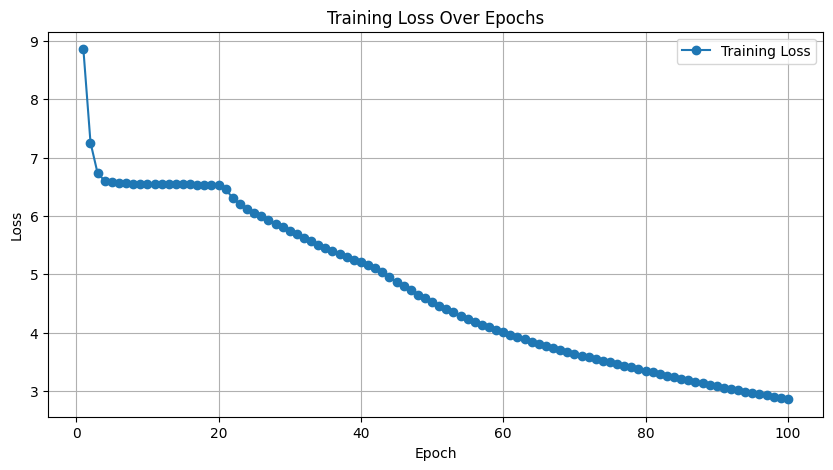

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import torch.nn as nn
import torch.optim as optim

def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w] for w in seq if w in to_ix]  # Ensure all words are in the dictionary
    return torch.tensor(idxs, dtype=torch.long)

# Tokenization: Create a mapping from words to indices
word_to_ix = {'<sos>': 0, '<eos>': 1, '<pad>':2}  # Start with sos and eos tokens
for sentence in corpus_clean:
    for word in sentence.split():
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)

# Creating ix_to_word dictionary by inverting word_to_ix
ix_to_word = {index: word for word, index in word_to_ix.items()}

sequence_length = 50
step = 45  # overlapping 5 words with the previous sequence

sequences = []
for song in corpus_clean:
    words = ['<sos>'] + song.split() + ['<eos>']
    for i in range(0, len(words), step):
        seq = words[i:i + sequence_length]
        if len(seq) < sequence_length:
            # Pad the sequence if it's not long enough
            seq += ['<pad>'] * (sequence_length - len(seq))
        seq_indices = prepare_sequence(seq, word_to_ix)
        sequences.append(seq_indices)

# Create Dataset and DataLoader
class LyricsDataset(Dataset):
    def __init__(self, sequences):
        self.sequences = sequences

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        seq = self.sequences[idx]
        return seq, seq  # input and target are the same

dataset = LyricsDataset(sequences)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim,num_layers=2 ):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim,num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)  # Transform word indices to embeddings
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out)
        return output

# Model initialization
vocab_size = len(word_to_ix)
EMBEDDING_DIM = 4
HIDDEN_DIM = 16
model = LSTMModel(vocab_size, EMBEDDING_DIM, HIDDEN_DIM)

# Loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop with loss tracking
num_epochs = 100
loss_history = []

for epoch in range(num_epochs):
    total_loss = 0
    for input_seq, target_seq in dataloader:
      input_seq, target_seq = input_seq.to(device), target_seq.to(device)

      optimizer.zero_grad()
      output = model(input_seq)
      output_flat = output.view(-1, vocab_size)
      target_seq_flat = target_seq.view(-1)

      # Ignore padding index in the loss calculation
      active_loss = target_seq_flat != word_to_ix['<pad>']
      active_logits = output_flat[active_loss]
      active_labels = target_seq_flat[active_loss]

      loss = loss_function(active_logits, active_labels)
      loss.backward()
      optimizer.step()
      total_loss += loss.item()
    epoch_loss = total_loss / len(dataloader)
    loss_history.append(epoch_loss)
    print(f'Epoch {epoch + 1}, Loss: {epoch_loss}')

# Plotting the loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), loss_history, marker='o', label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()




In [ ]:
def generate_text(model, start_text, word_to_ix, ix_to_word, strategy='greedy', k=5, temperature=1.0, max_length=50, device='cuda'):
    model.eval()
    words = start_text.split() if start_text else ['<sos>']
    input_ids = [word_to_ix.get(word, word_to_ix['<sos>']) for word in words if word in word_to_ix]  # Start with start_text if provided
    input_tensor = torch.tensor([input_ids], dtype=torch.long).to(device)  # Ensure the tensor is on the correct device

    generated_words = words[:-1]  # Start with all but the last word of the input text

    for _ in range(max_length):
        output = model(input_tensor)
        output = output[0, -1, :]  # Take the logits of the last time step

        # Apply temperature scaling
        output = output / temperature

        # Convert logits to probabilities
        probabilities = torch.softmax(output, dim=0)

        # Select next word token depending on the strategy
        if strategy == 'greedy':
            next_token_id = torch.argmax(probabilities).item()
        elif strategy == 'top-k':
            top_probs, top_idx = torch.topk(probabilities, k)
            next_token_id = top_idx[torch.multinomial(top_probs, 1).item()].item()
        elif strategy == 'temperature':
            next_token_id = torch.multinomial(probabilities, 1).item()

        next_word = ix_to_word[next_token_id]
        if next_word == '<eos>':
            break
        generated_words.append(next_word)
        # Update the input for the next prediction
        input_ids.append(next_token_id)
        input_tensor = torch.tensor([input_ids], dtype=torch.long).to(device)  # Update the tensor on the correct device
    if generated_words and generated_words[0] == '<sos>':
        generated_words = generated_words[1:]  # Remove the initial <sos> if present

    return ' '.join(generated_words)


In the text generation component, I explored three different selection strategies for predicting the next word: greedy, temperature, and temperature-based sampling. Ultimately, I chose the top-k strategy as the most effective approach.

In [ ]:
start_texts = ["it's not a silly little moment", "please picture me in the trees", ""]
strategies = ['greedy', 'top-k', 'temperature']

for text in start_texts:
    print(f"Generating text from: '{text if text else 'Empty Start'}'")
    for strategy in strategies:
        if strategy == 'top-k':
            generated = generate_text(model, text, word_to_ix, ix_to_word, strategy=strategy, k=70)
        elif strategy == 'temperature':
            generated = generate_text(model, text, word_to_ix, ix_to_word, strategy=strategy, temperature=1.1)
        else:
            generated = generate_text(model, text, word_to_ix, ix_to_word, strategy=strategy)
        print(f"Strategy: {strategy}, Generated: '{generated}'")
    print("\n")

Generating text from: 'it's not a silly little moment'
Strategy: greedy, Generated: 'it's not a silly little people people people people people people people people people people people people people people people people people people people people people people people people people people people people people people people people people people people people people people people people people people people people people people people people people people'
Strategy: top-k, Generated: 'it's not a silly little moment there keep there better miss heard look there ever look line true as as can't we we i'm her there's back never is my my my they they my my my my in to in to to in to on the i i they can na home home home'
Strategy: temperature, Generated: 'it's not a silly little city hate place room leave makes it? broken bitch bad god lies flames sand tried control bodies dressed sing anything die water days days touch into live alright night still where tell that's not i'm i'm her i'm what

note that when the model is prompted with an empty string, it struggles to generate meaningful text. This issue arises because the model lacks a clear starting point or context to guide its predictions. Without initial words to set the context, the model cannot effectively leverage its learned patterns, resulting in less coherent text generation. However, when given specific starting words, the model performs significantly better. Although the output is not perfect, the chosen words are influenced by the initial prompt, which helps the model generate text that is more relevant and contextually appropriate. This demonstrates that providing a clear starting point greatly enhances the model's ability to produce coherent and contextually connected text.